# 2.5 Cross validation: Gradient Bossting vs RandomForest

Realicemos una predicción basada en un Gradient Bossting. 
Se parte de los datos analizados, normalizados y acotados logrados en el punto 0, para el training.

En este caso no vamos a jugar tanto con los parámetros, como con los modelos que existen. Utilizaremos uno de tipo arboles de decisión (randomforest) y uno de regresiones lineales (Gradient Bossting) y veremos cual se comporta mejor de base, mediante un Cross validation


## Importación de datos y selección de variables


In [1]:
#Librerías a usar

import pandas as pd
import numpy as np

#Importación de datos
melbourne_data = pd.read_csv("data/PreciosCasas/train_final.csv", sep='\t', encoding='utf-8') 

# print a summary of the data in Melbourne data
melbourne_data.describe()

Unnamed: 0           Id   MSSubClass        LotArea  OverallQual  \
count  1457.000000  1457.000000  1457.000000    1457.000000  1457.000000   
mean    728.805765   729.805765    56.877145   10460.434454     6.094715   
std     421.402158   421.402158    42.339638    9862.564977     1.376542   
min       0.000000     1.000000    20.000000    1300.000000     1.000000   
25%     364.000000   365.000000    20.000000    7540.000000     5.000000   
50%     729.000000   730.000000    50.000000    9473.000000     6.000000   
75%    1093.000000  1094.000000    70.000000   11600.000000     7.000000   
max    1459.000000  1460.000000   190.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   BsmtFinSF1   BsmtFinSF2  \
count  1457.000000  1457.000000   1457.000000  1457.000000  1457.000000   
mean      5.576527  1971.194235   1984.818806   439.128346    46.645161   
std       1.113638    30.190353     20.640669   432.964939   161.471529   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1994.000000   383.000000     0.000000   
75%       6.000000  2000.000000   2004.000000   712.000000     0.000000   
max       9.000000  2010.000000   2010.000000  2188.000000  1474.000000   

               ...            SaleType_ConLw  SaleType_New  SaleType_Oth  \
count          ...               1457.000000   1457.000000   1457.000000   
mean           ...                  0.003432      0.082361      0.002059   
std            ...                  0.058500      0.275008      0.045345   
min            ...                  0.000000      0.000000      0.000000   
25%            ...                  0.000000      0.000000      0.000000   
50%            ...                  0.000000      0.000000      0.000000   
75%            ...                  0.000000      0.000000      0.000000   
max            ...                  1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
count  1457.000000            1457.000000            1457.000000   
mean      0.868909               0.069321               0.002745   
std       0.337616               0.254086               0.052342   
min       0.000000               0.000000               0.000000   
25%       1.000000               0.000000               0.000000   
50%       1.000000               0.000000               0.000000   
75%       1.000000               0.000000               0.000000   
max       1.000000               1.000000               1.000000   

       SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
count           1457.000000           1457.000000           1457.000000   
mean               0.008236              0.013727              0.821551   
std                0.090410              0.116395              0.383022   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              1.000000   
50%                0.000000              0.000000              1.000000   
75%                0.000000              0.000000              1.000000   
max                1.000000              1.000000              1.000000   

       SaleCondition_Partial  
count            1457.000000  
mean                0.084420  
std                 0.278112  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000  

[8 rows x 222 columns]

In [2]:
#Vamos a ver que variables elegimos

print(melbourne_data.columns)

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=222)


Queremos prededir el precio, será nuestro target, para lo cual, cogeremos unas variables como pedictores

In [3]:
y= melbourne_data.SalePrice
print(y.head())
melbourne_predictors = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = melbourne_data[melbourne_predictors]
X.describe()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64


LotArea    YearBuilt     1stFlrSF     2ndFlrSF     FullBath  \
count    1457.000000  1457.000000  1457.000000  1457.000000  1457.000000   
mean    10460.434454  1971.194235  1159.129032   345.560055     1.563487   
std      9862.564977    30.190353   372.015864   435.505117     0.549961   
min      1300.000000  1872.000000   334.000000     0.000000     0.000000   
25%      7540.000000  1954.000000   882.000000     0.000000     1.000000   
50%      9473.000000  1972.000000  1086.000000     0.000000     2.000000   
75%     11600.000000  2000.000000  1391.000000   728.000000     2.000000   
max    215245.000000  2010.000000  3228.000000  2065.000000     3.000000   

       BedroomAbvGr  TotRmsAbvGrd  
count   1457.000000   1457.000000  
mean       2.866163      6.510638  
std        0.816595      1.616384  
min        0.000000      2.000000  
25%        2.000000      5.000000  
50%        3.000000      6.000000  
75%        3.000000      7.000000  
max        8.000000     14.000000

## Modelo Random forest 

Pasamos directamente a modelar sin más (el objeto no son los parámetros, es comparar los modelos)

In [15]:
#Importación de librerías

from  sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate

#Separamos los datos en dos grupos, 
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)


In [16]:
# 1) RandomForest
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_test)
print(mean_absolute_error(y_test, melb_preds))


0.133609440716


In [19]:
def score_dataset_cv(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    scores = cross_validate(model, X_train, y_train,
                         scoring=('r2', 'neg_mean_absolute_error'))
    print(-scores['test_neg_mean_absolute_error'])      
    print(scores['test_r2']) 
    
score_dataset_cv(X_train, X_test, y_train, y_test)

[ 0.14156713  0.14520264  0.13336128]
[ 0.73456125  0.76459303  0.77818127]


## Modelo GradientBoostingRegressor 

Pasamos directamente a modelar sin más (el objeto no son los parámetros, es comparar los modelos)

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate

def score_dataset_cv(X_train, X_test, y_train, y_test):
    model = GradientBoostingRegressor()
    scores = cross_validate(model, X_train, y_train,
                         scoring=('r2', 'neg_mean_absolute_error'))
    print(-scores['test_neg_mean_absolute_error'])      
    print(scores['test_r2'])                         

score_dataset_cv(X_train, X_test, y_train, y_test)

[ 0.13375915  0.13823556  0.12399015]
[ 0.75139868  0.7800183   0.81837829]


## Mejoras en el modelo - Hiperparámetros

Tenemos los dos modelos y se comportan de forma bastante similar (parecía que uno lineal podía ser mejor, pero no termina de ser tan obvio), así que vamos a hacer mirar que parámetros son los que debo cambiar para mi modelo


In [23]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [70, 100, 120], 'max_depth': [3, 5, 7, 10], 'subsample': [0.60, 0.7, 0.80],'min_weight_fraction_leaf':[0.20, 0.1, 0.05]}
gbr = GradientBoostingRegressor()
clf = GridSearchCV(gbr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [70, 100, 120], 'max_depth': [3, 5, 7, 10], 'subsample': [0.6, 0.7, 0.8], 'min_weight_fraction_leaf': [0.2, 0.1, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [24]:
clf.cv_results_

{'mean_fit_time': array([ 0.0609986 ,  0.05113602,  0.05222217,  0.09214973,  0.08438269,
         0.08170168,  0.09218542,  0.10509396,  0.09426618,  0.05707097,
         0.06233708,  0.0645109 ,  0.08340208,  0.07685804,  0.08996288,
         0.10349623,  0.10861866,  0.09865777,  0.06299774,  0.0649151 ,
         0.11139361,  0.17240024,  0.17814382,  0.16331951,  0.1204435 ,
         0.10525878,  0.10543172,  0.05417323,  0.04990101,  0.05515361,
         0.09470089,  0.08980044,  0.08696946,  0.10188882,  0.09827542,
         0.09439476,  0.06897259,  0.0933431 ,  0.09260909,  0.10011546,
         0.10621397,  0.10553567,  0.11838031,  0.12657666,  0.13329109,
         0.08023659,  0.08063094,  0.0798924 ,  0.11103646,  0.11555052,
         0.10778944,  0.13073039,  0.13452752,  0.13723675,  0.05878297,
         0.05907623,  0.06086405,  0.15417035,  0.15760676,  0.15160426,
         0.09794474,  0.12026413,  0.09958625,  0.07593926,  0.06751283,
         0.06990274,  0.10141937, 

In [25]:
clf.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.05,
             n_estimators=120, presort='auto', random_state=None,
             subsample=0.6, verbose=0, warm_start=False)


## Selección

Genial, ya sabemos que parametros hemos de coger y que son lo más optimos en este caso, veamos que se obtiene ahora 

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate

def score_dataset_cv(X_train, X_test, y_train, y_test):
    model = GradientBoostingRegressor(n_estimators= 100, max_depth=5, subsample= 0.7
                                      ,min_weight_fraction_leaf=0.1)
    scores = cross_validate(model, X_train, y_train,
                         scoring=('r2', 'neg_mean_absolute_error'), cv=10)
    print(-scores['test_neg_mean_absolute_error'])      
    print(scores['test_r2'])                         

score_dataset_cv(X_train, X_test, y_train, y_test)

[ 0.14901905  0.13464619  0.12518018  0.15877724  0.13403575  0.14804185
  0.13385177  0.12829163  0.13793748  0.12125371]
[ 0.67796801  0.79787778  0.76286809  0.69742384  0.81480704  0.75726779
  0.78034657  0.80347735  0.77701473  0.82469473]


In [32]:
#Error cometido en esta medicion MAE 
prediccion = clf.predict(X_test)
print("y en este caso el error es: ")
print (mean_absolute_error(y_test,prediccion ))

y en este caso el error es: 
0.11875604746


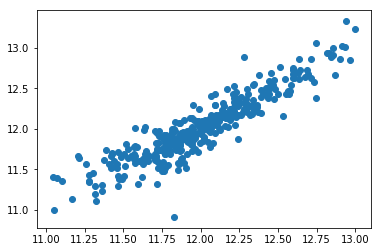

In [35]:
# Veamoslo en un scatter plot
import matplotlib.pyplot as plt

plt.scatter(prediccion, y_test);
plt.show()